In [192]:
import pandas as pd

original_data = pd.read_excel('dataset/Dep_15_Resultats_com_T1_c.xlsx', header=2)
original_data_canton = pd.read_excel('dataset/Dep_15_Resultats_T1_c.xlsx', header=2, sheet_name="Cantons")

df = original_data.copy()
df_canton = original_data_canton.copy()



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36960 entries, 0 to 36959
Data columns (total 87 columns):
Date de l'export          36960 non-null datetime64[ns]
Code du département       36960 non-null object
Libellé du département    36960 non-null object
Code du canton            36960 non-null int64
Libellé du canton         36960 non-null object
Code de la commune        36960 non-null int64
Libellé de la commune     36960 non-null object
Inscrits                  36960 non-null int64
Abstentions               36960 non-null int64
% Abs/Ins                 36960 non-null float64
Votants                   36960 non-null int64
% Vot/Ins                 36960 non-null float64
Blancs                    36960 non-null int64
% Blancs/Ins              36960 non-null float64
% Blancs/Vot              36960 non-null float64
Nuls                      36960 non-null int64
% Nuls/Ins                36960 non-null float64
% Nuls/Vot                36960 non-null float64
Exprimés            

In [44]:
def explodeLines(data, n):
	initdf = data[['Code du département', 'Libellé du département', 'Code du canton', 
			'Libellé du canton', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants',
			'% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
			'% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]

	headers = ['N°Panneau', 'Nuance', 'Binôme', 'Voix', '% Voix/Ins', '% Voix/Exp']

	df = pd.DataFrame()
	for i in range(n):
		partidf = data[[h+'.'+str(i) if i!=0 else h for h in headers]]
		partidf = pd.concat([initdf, partidf], axis=1)
		partidf.columns = pd.Index(initdf.columns.values.tolist() + headers)
		df = pd.concat([df, partidf])

	# Remove useless rows
    
	useless_rows = pd.isnull(df[headers]).all(axis=1)
	df = df[~useless_rows]
    
	return df

In [221]:
#make filter to get data from the cher department
cher_raws = df['Code du département'] == 18

cher_data = df[cher_raws]
cher_data_canton = df_canton[df_canton['Code du département']==18]

# explode line 
nb_partie = len([header for header in cher_data.columns if "Binôme" in header])
cher_data = explodeLines(cher_data, nb_partie)



In [190]:
# save cher_data as excel
writer = pd.ExcelWriter('dataset/Dep_2015_cher_com_explode.xlsx')

# write dataframe to excel
cher_data.to_excel(writer)

# save the excel
writer.save()


## data information

In [48]:
cher_data.describe()

,Code du canton,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Voix,% Voix/Ins,% Voix/Exp
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,10.434243,778.081886,381.124069,43.920943,396.957816,56.079057,17.618693,2.111828,3.748577,5.292804,0.822018,1.469429,374.046319,53.144938,94.782440,2.582299,91.030604,12.915368,24.317560
std,5.198623,1675.795439,911.307227,6.305293,769.355297,6.305293,54.173831,1.439842,2.322747,10.700017,0.764296,1.333773,715.078969,6.049308,2.626115,1.207750,200.293791,7.481389,13.390607
min,1.000000,23.000000,3.000000,12.500000,16.000000,40.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,36.070000,84.780000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,189.000000,79.000000,40.140000,114.000000,51.970000,3.000000,1.300000,2.400000,1.000000,0.340000,0.620000,108.000000,49.070000,93.510000,2.000000,18.000000,6.850000,13.070000
50%,10.000000,324.000000,141.000000,44.720000,182.000000,55.280000,6.000000,1.870000,3.450000,2.000000,0.650000,1.200000,170.000000,52.600000,95.190000,3.000000,38.000000,12.440000,23.770000
75%,15.000000,583.000000,274.000000,48.030000,320.000000,59.860000,13.000000,2.570000,4.650000,5.000000,1.080000,2.000000,310.000000,57.060000,96.560000,4.000000,79.000000,17.250000,33.330000
max,19.000000,12476.000000,6580.000000,59.090000,5896.000000,87.500000,592.000000,12.500000,15.000000,77.000000,4.470000,7.620000,5464.000000,75.000000,100.000000,6.000000,2633.000000,50.000000,78.380000


In [52]:
cher_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 6435 to 6621
Data columns (total 24 columns):
Code du département       1209 non-null object
Libellé du département    1209 non-null object
Code du canton            1209 non-null int64
Libellé du canton         1209 non-null object
Inscrits                  1209 non-null int64
Abstentions               1209 non-null int64
% Abs/Ins                 1209 non-null float64
Votants                   1209 non-null int64
% Vot/Ins                 1209 non-null float64
Blancs                    1209 non-null int64
% Blancs/Ins              1209 non-null float64
% Blancs/Vot              1209 non-null float64
Nuls                      1209 non-null int64
% Nuls/Ins                1209 non-null float64
% Nuls/Vot                1209 non-null float64
Exprimés                  1209 non-null int64
% Exp/Ins                 1209 non-null float64
% Exp/Vot                 1209 non-null float64
N°Panneau                 1209 non-null flo

In [49]:
cher_data.head()

,Code du département,Libellé du département,Code du canton,Libellé du canton,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,...,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Nuance,Binôme,Voix,% Voix/Ins,% Voix/Exp
6435,18,CHER,1,Aubigny-sur-Nère,1774,828,46.67,946,53.33,15,...,0.95,922,51.97,97.46,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,64.0,3.61,6.94
6436,18,CHER,1,Aubigny-sur-Nère,4226,1912,45.24,2314,54.76,64,...,2.03,2203,52.13,95.20,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,277.0,6.55,12.57
6437,18,CHER,1,Aubigny-sur-Nère,944,449,47.56,495,52.44,27,...,1.01,463,49.05,93.54,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,40.0,4.24,8.64
6438,18,CHER,1,Aubigny-sur-Nère,896,429,47.88,467,52.12,20,...,1.28,441,49.22,94.43,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,26.0,2.90,5.90
6439,18,CHER,1,Aubigny-sur-Nère,500,206,41.20,294,58.80,17,...,2.04,271,54.20,92.18,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,33.0,6.60,12.18


In [50]:
# affiche les differents parties
cher_data['Nuance'].value_counts(dropna=False)

BC-SOC    291
BC-FN     289
BC-UD     270
BC-FG     152
BC-DVG    139
BC-DVD     25
BC-UDI     13
BC-UMP     13
BC-UC      11
BC-DLF      3
BC-UG       3
Name: Nuance, dtype: int64

## data visualisation

In [234]:
# dataframe qui represente le nb de voix par cantons par parties

#df_nbVoix = cher_data.groupby(['Code du canton', 'Nuance']).agg({'Voix':['sum']})
#df_nbVoix.unstack()


df_plot = cher_data.groupby(['Code du canton', 'Nuance'])['Voix'].sum().unstack().reset_index(drop=True).fillna(0)

# ajoute le nombre de vote blanc par canton dans le dataframe a plotter
df_nbBlc  = cher_data_canton['Blancs'].reset_index(drop=True)

df_plot = pd.concat([df_nbBlc,df_plot ], axis=1)

# ajoute le nombre d'abstentioniste par canton dans le dataframe a plotter
df_nbAbs  = cher_data_canton['Abstentions'].reset_index(drop=True)
df_plot = pd.concat([df_nbAbs,df_plot ], axis=1)

# on normalise les lignes
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)






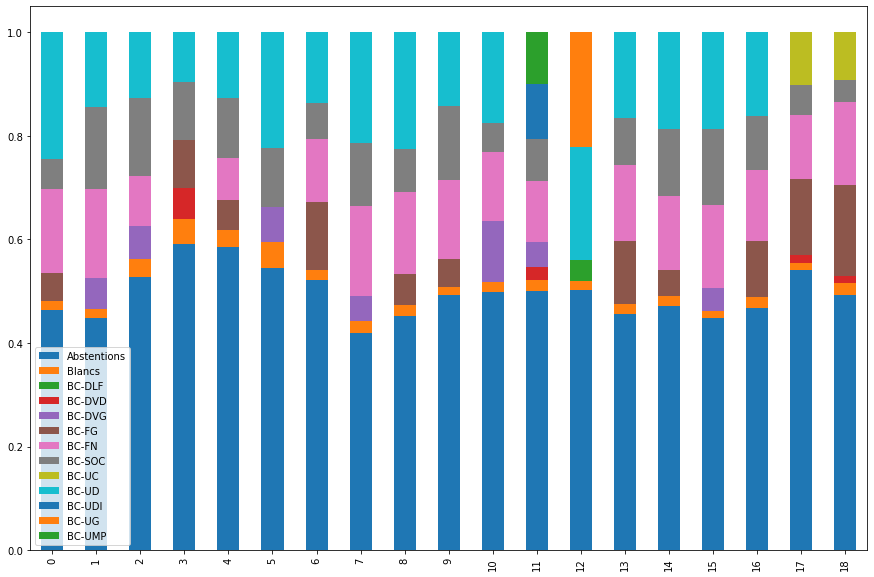

In [235]:
df_plot.plot(kind='bar', stacked=True, figsize=(15,10))